тут мы посмотрим какие функции потерь бывают и как их выбирать.


Разделить функции потерь можно на следующие типы:

Задача регрессии:
* Mean Squared Error Loss
* Mean Squared Logarithmic Error Loss
* Mean Absolute Error Loss

Задача бинарной классификации
* Binary Cross-Entropy
* Hinge Loss
* Squared Hinge Loss

Мультикласс классификация
* Multi-Class Cross-Entropy Loss
* Sparse Multiclass Cross-Entropy Loss
* Kullback Leibler Divergence Loss

Задача регрессии

Сгенерируем выборку для регрессии и одну архитектуру и посмотрим, что там у нас в итоге получится.

In [8]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
%matplotlib inline

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# скалируем, так как нам все это нужно для нейронки
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
# бьем на трейн и тест
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.optimizers import SGD


model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))


Train: 0.002, Test: 0.005


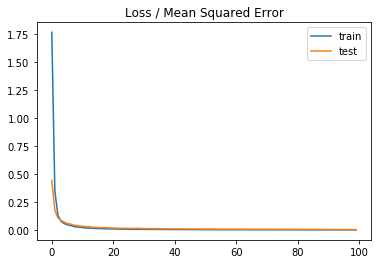

In [12]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)
# обучаем
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# применяем модель
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# рисуем красивые графики
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Теперь пересобрем модель с другой ошибкой
$\sqrt{ \frac{1}{N} \sum_{i=1}^N (\log(x_i) - \log(y_i))^2 }$

Мы ожидаем, что наши значения таргета и прогноза будут очень большими и не хотим так сильно штрафовать, как mse.

Train: 0.076, Test: 0.103


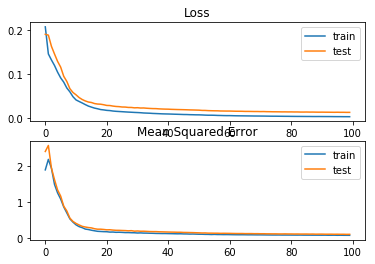

In [13]:
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# рисуем новый лосс
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# и рисуем mse
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mean_squared_error'], label='train')
pyplot.plot(history.history['val_mean_squared_error'], label='test')
pyplot.legend()
pyplot.show()

Часто, у нас в целом, распределение таргета более менее нормальное, но есть выбросы - слишком маленькие или слишком большие значения. Тогда мы используем MAE. Данная метрика не так сильно переобучается под выбросы.

Train: 0.130, Test: 0.170


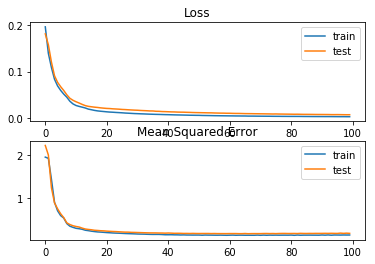

In [14]:

model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# loss
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# mse
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mean_squared_error'], label='train')
pyplot.plot(history.history['val_mean_squared_error'], label='test')
pyplot.legend()

### Функции ошибок для бинарной классификации
Начнем бинарной-кроссэнтропии





In [16]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
# бьем по классам, внутри окружности
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# бьем на тест трейн
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]



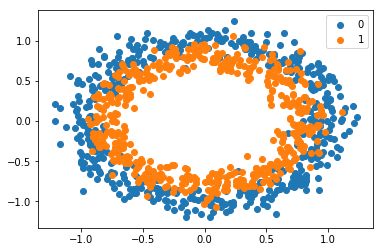

In [18]:
from numpy import where
for i in range(2):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

### Binary Cross-Entropy Loss

Train: 0.832, Test: 0.844


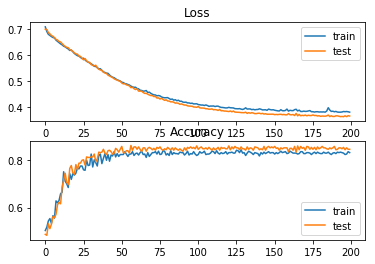

In [19]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# обучаем модель
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# применяем
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# рисуем лосс
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# и считаем точность
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Бинарная кроссэнтропия самая хорошая функция потерь, когда у нас бинарный таргет. 
Математически, она наиболее близка к функциям максимального правдоподобия, поэтому используем её. считаем среднее расхождение между реальной и прогнозной вероятностью.

### Hinge Loss
Как альтернатива, можно использовать Hingle loss. Изначально эта ошибка была разработана для svm. Таргет у нас должен принимать значение 1 и -1. Иногда лучше иногда хуже бинарной-кроссэнтропии

Train: 0.792, Test: 0.760


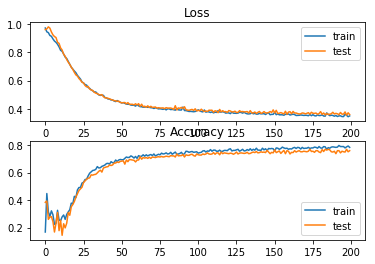

In [22]:
y[where(y == 0)] = -1
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# определяем модель
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
# обратим внимание, для такой потери лучше гиперболический тангенс в качестве активации
model.add(Dense(1, activation='tanh'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='hinge', optimizer=opt, metrics=['accuracy'])
# обучаем
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# рисуем лосс
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# рисуем точность
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

### Squared Hinge Loss
Можно использовать квадратичные потери Хингла. Она чуть более плавная, чем обычная.

Train: 0.684, Test: 0.652


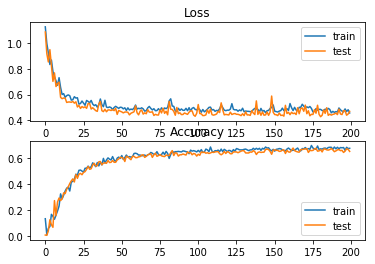

In [24]:
y[where(y == 0)] = -1
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# определяем модель
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
# обратим внимание, для такой потери лучше гиперболический тангенс в качестве активации
model.add(Dense(1, activation='tanh'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='squared_hinge', optimizer=opt, metrics=['accuracy'])
# обучаем
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# рисуем лосс
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# рисуем точность
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

мы видим, что изменения менее гладкие для этой задачи, малые изменения весов не так сильно влияют на нашу функцию.

### Мультиклассификация.

In [26]:
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encoding 
y = to_categorical(y)

n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

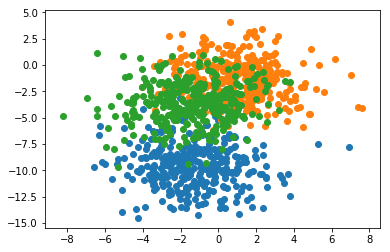

In [28]:
for i in range(3):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()

### Multi-Class Cross-Entropy Loss
Категориальная кросс-энтропия, все по канонам. Софтмакс активация и one hot encoding таргета

Train: 0.832, Test: 0.834


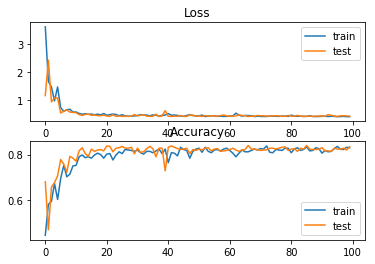

In [30]:

model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

### Sparse Multiclass Cross-Entropy Loss
Если мы не можем делать one hot по каким либо причинам, можем посчитать разреженную кросс энтропию.

Train: 0.820, Test: 0.798


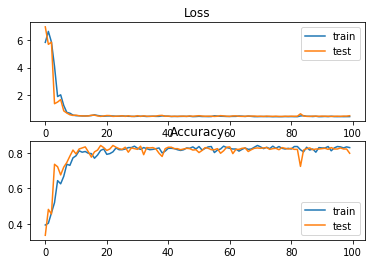

In [31]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

### Kullback Leibler Divergence Loss

Дивергенция Кулбека Лейблера, или сокращенно KL, является мерой того, как одно распределение вероятностей отличается от базового распределения.

Потеря дивергенции KL 0 предполагает, что распределения идентичны. На практике поведение KL Divergence очень похоже на перекрестную энтропию. Он вычисляет, сколько информации теряется (в битах), если прогнозируемое распределение вероятностей используется для аппроксимации желаемого целевого распределения вероятностей.

Таким образом, функция потери дивергенции KL чаще используется при использовании моделей, которые учатся аппроксимировать более сложную функцию, чем просто мультиклассовая классификация. Например, в VAE автоэнкодерах используем похожий лосс, так как мы должны сравнить именно распределения.

Train: 0.840, Test: 0.828


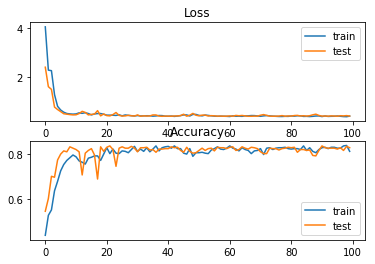

In [32]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
y = to_categorical(y)
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='kullback_leibler_divergence', optimizer=opt, metrics=['accuracy'])
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# рисовашки
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()